In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
X=np.random.rand(100,1)

In [4]:
y=4 + 3* X+ np.random.randn(100,1)

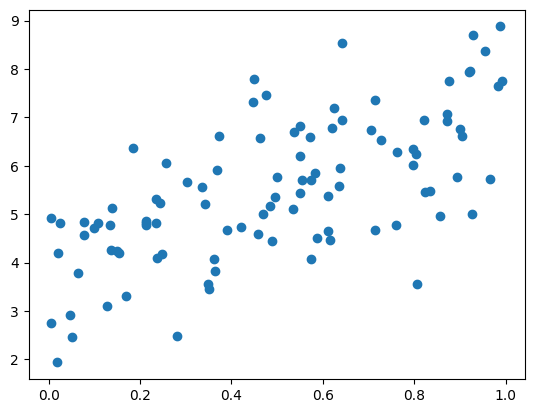

In [5]:
plt.scatter(X,y)

In [6]:
# creatre a column matrix of ones then concantinate with feature vector 
X_b = np.c_[np.ones((100, 1)), X]

In [7]:
X_b

array([[1.        , 0.14907855],
       [1.        , 0.12850507],
       [1.        , 0.7132799 ],
       [1.        , 0.10855665],
       [1.        , 0.61097042],
       [1.        , 0.80647218],
       [1.        , 0.89400861],
       [1.        , 0.33543657],
       [1.        , 0.71506817],
       [1.        , 0.34949107],
       [1.        , 0.09960897],
       [1.        , 0.28045996],
       [1.        , 0.25611018],
       [1.        , 0.95426108],
       [1.        , 0.98381464],
       [1.        , 0.35119606],
       [1.        , 0.98770782],
       [1.        , 0.48838086],
       [1.        , 0.63565812],
       [1.        , 0.05127234],
       [1.        , 0.61942109],
       [1.        , 0.58687721],
       [1.        , 0.04622108],
       [1.        , 0.90069747],
       [1.        , 0.57504948],
       [1.        , 0.80359302],
       [1.        , 0.23410214],
       [1.        , 0.76126461],
       [1.        , 0.92831925],
       [1.        , 0.44736422],
       [1.

In [8]:
len(X_b)

100

In [9]:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
theta_best

array([[3.84896888],
       [3.33858173]])

In [11]:
 X_new = np.array([[0], [2]])

In [12]:
X_new.shape

(2, 1)

In [13]:
X_new_b=np.c_[np.ones((2,1)),X_new]

In [14]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [15]:
y_pred=X_new_b.dot(theta_best)

In [16]:
y_pred

array([[ 3.84896888],
       [10.52613234]])

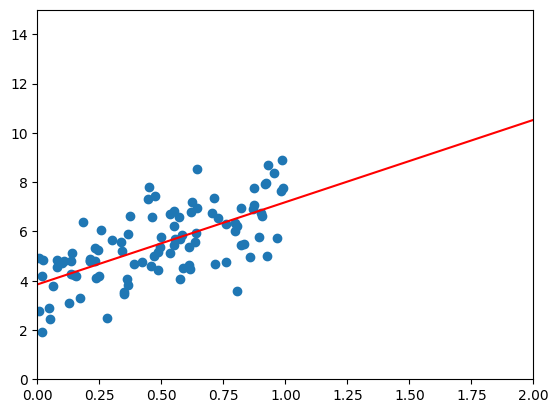

In [17]:
plt.plot(X_new,y_pred,"r-")
plt.scatter(X,y)
plt.axis([0,2,0,15])
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression as LR
lin_reg=LR()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.84896888]), array([[3.33858173]]))

In [19]:
predict=lin_reg.predict(X_new)

In [20]:
predict

array([[ 3.84896888],
       [10.52613234]])

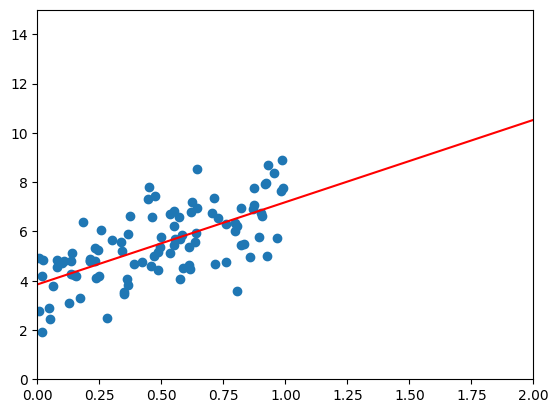

In [21]:
plt.plot(X_new,predict,"r-")
plt.scatter(X,y)
plt.axis([0,2,0,15])
plt.show()

**LINEAR REGASSION USING BATCH GRADIANT DECENT**

In [22]:
eta=0.1
n_iterations=1000
m=100
theta=np.random.randn(2,1)
for i in range(n_iterations):
    gradiant=2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta=theta- eta * gradiant

In [23]:
theta

array([[3.84896969],
       [3.3385802 ]])

In [24]:
from sklearn.linear_model import SGDRegressor as SGD
sgd_reg=SGD(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

(array([3.82160484]), array([3.1683671]))

In [25]:
predict=sgd_reg.predict(X_new_b.reshape(-1,1))

In [26]:
predict

array([ 6.98997195,  3.82160484,  6.98997195, 10.15833905])

In [27]:
n_epochs=50
m=len(X_b)
t0,t1=5,50
#learnig_schedule a function (equation that gives learning rate)
def learning_schedule(t):
    return t0/(t+t1)
theta=np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradiants=2/m * xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradiants

In [28]:
theta

array([[1.79648163],
       [1.36865327]])

In [29]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [30]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

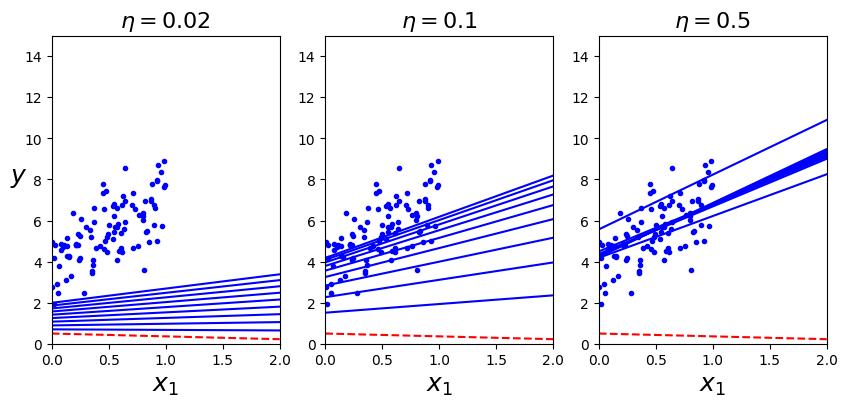

In [31]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.savefig("gradient_descent_plot")
plt.show()

In [32]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

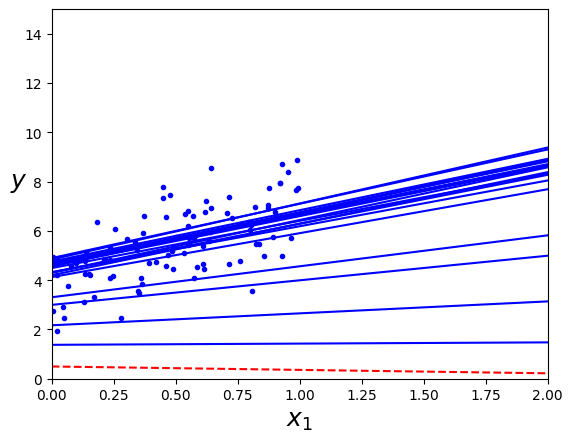

In [33]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.savefig("sgd_plot")                                 # not shown
plt.show()                

In [34]:
theta

array([[3.81912095],
       [3.40283935]])

In [35]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

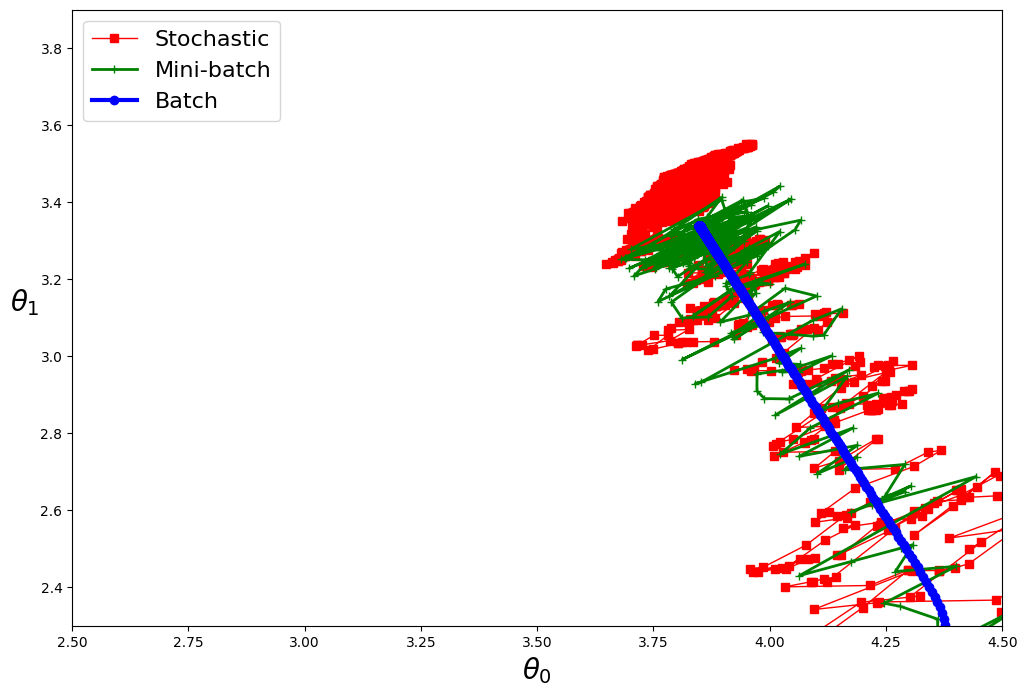

In [36]:
plt.figure(figsize=(12,8))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.savefig("gradient_descent_paths_plot")
plt.show()

In [37]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [38]:
X

array([[-2.53415534],
       [ 1.97322766],
       [-0.90665955],
       [ 0.12959638],
       [ 1.7669138 ],
       [ 2.30625928],
       [-0.93131148],
       [-0.22893911],
       [-0.51290361],
       [-2.9204938 ],
       [-1.22434267],
       [-0.2448646 ],
       [-0.53343835],
       [ 1.33157537],
       [-0.6911783 ],
       [-0.06374131],
       [-0.42234845],
       [ 1.44375689],
       [ 2.17783439],
       [ 0.19133447],
       [ 1.73659317],
       [-1.21927991],
       [ 0.24821766],
       [-0.92862028],
       [-0.51479445],
       [ 1.39448319],
       [ 2.28997489],
       [-2.27102765],
       [ 0.80783554],
       [ 0.49286285],
       [-2.28950976],
       [-1.72863402],
       [-1.13398503],
       [-1.99841358],
       [-1.5376231 ],
       [-1.39439521],
       [-0.985957  ],
       [ 1.49634272],
       [ 0.43147322],
       [ 2.91748003],
       [-0.51158504],
       [ 1.52319044],
       [ 2.22881053],
       [ 1.07387096],
       [-0.52881156],
       [ 1

In [39]:
y

array([[ 1.92601100e+00],
       [ 5.82642894e+00],
       [ 2.20889102e+00],
       [ 3.62775913e+00],
       [ 4.44280629e+00],
       [ 8.42275385e+00],
       [ 1.04979739e+00],
       [ 1.66735766e+00],
       [ 2.20006396e+00],
       [ 3.14091214e+00],
       [ 2.63528242e+00],
       [ 1.38051059e+00],
       [ 1.21930490e+00],
       [ 5.27010180e+00],
       [ 7.84561034e-01],
       [ 2.18721927e+00],
       [ 6.35799053e-03],
       [ 6.30561323e+00],
       [ 7.75586765e+00],
       [ 4.95974611e+00],
       [ 6.58283481e+00],
       [ 3.94391609e-01],
       [ 2.94767352e+00],
       [ 5.84538770e-01],
       [ 3.19574972e+00],
       [ 3.26563458e+00],
       [ 5.76281252e+00],
       [ 6.97944194e-01],
       [ 2.64575485e+00],
       [ 1.92484191e+00],
       [ 1.06976861e+00],
       [ 3.75526287e+00],
       [ 2.03885669e+00],
       [ 2.41064937e+00],
       [ 3.23368372e+00],
       [ 1.83403158e+00],
       [ 7.51418401e-01],
       [ 2.91565374e+00],
       [ 1.7

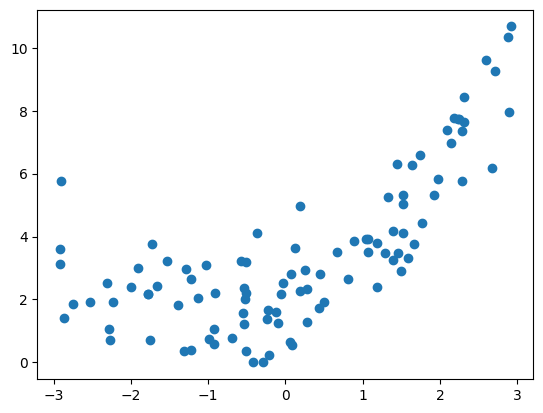

In [40]:
plt.scatter(X,y)

In [41]:
def scatter_plot(n):
    X=np.random.rand(n,1)-5
    y=0.5*X**3+X**2+X+6
    plt.scatter(X,y)
    plt.title("scatter plot")
    plt.xlabel('X')
    plt.ylabel('Y')

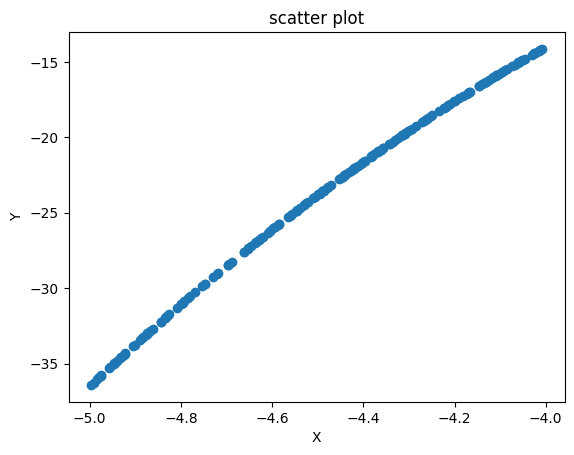

In [42]:
scatter_plot(200)

In [43]:
from sklearn.preprocessing import PolynomialFeatures as PF
poly_featurs=PF(degree=2,include_bias=False)
X_poly=poly_featurs.fit_transform(X)
X_poly[0]

array([-2.53415534,  6.42194331])

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.00704064]), array([[1.04541031, 0.52314711]]))

In [45]:
lin_reg.coef_

array([[1.04541031, 0.52314711]])

In [46]:
lin_reg.intercept_

array([2.00704064])

**Learning curves-used to know the data is overfitting or underfitting**

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curve(model_obj,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_erros,val_errors=[],[]
    for m in range (1,len(X_train)):
        model_obj.fit(X_train[:m],y_train[:m])
        y_train_pred=model_obj.predict(X_train[:m])
        y_val_pred=model_obj.predict(X_val)
        train_erros.append(mean_squared_error(y_train[:m],y_train_pred))
        val_errors.append(mean_squared_error(y_val,y_val_pred))
    plt.plot(np.sqrt(train_erros),"r-+",linewidth=2,label="training set")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="validation set")

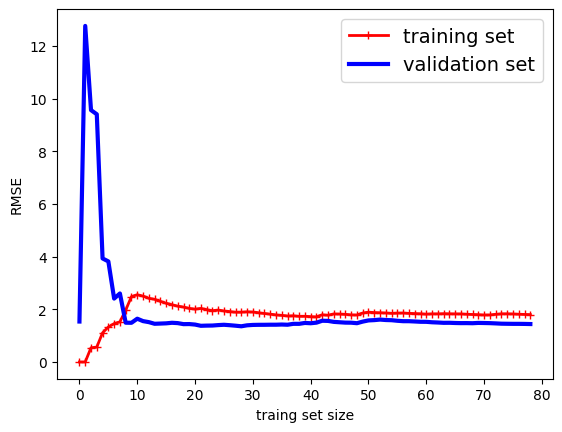

In [48]:
lin_reg=LinearRegression()
plot_learning_curve(lin_reg,X,y)
plt.legend(loc='upper right',fontsize=14)
plt.xlabel("traing set size")
plt.ylabel("RMSE")
plt.show()

**Initially VALIDATION ERROR IS BIG AND TRAING SET ERROR IS SMALL BECAUSE FEATURES ARE LESS INITIALLY**

In [49]:
plt.savefig("linerar_reg")

<Figure size 640x480 with 0 Axes>

In [50]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)

In [51]:
lin_reg=LinearRegression()

In [52]:
def pipe_line():
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import PolynomialFeatures
    polynomial_regression=Pipeline([
        ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
        ("lin_reg",LinearRegression())
    ])
    return polynomial_regression
    

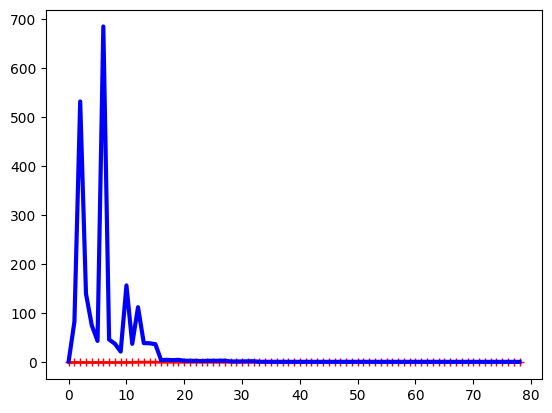

In [53]:
plot_learning_curve(pipe_line(),X,y)

In [54]:
y_train.shape

(80, 1)

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression=Pipeline([
        ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
        ("lin_reg",LinearRegression())
])

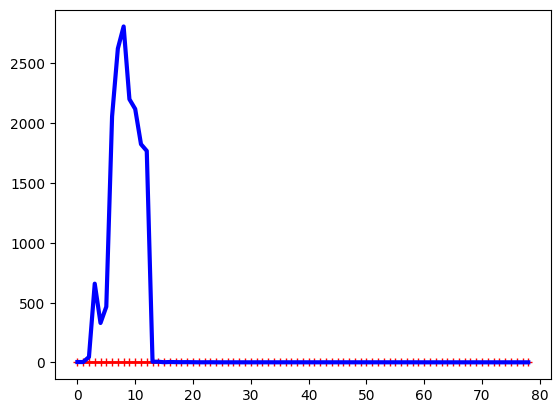

In [56]:
plot_learning_curve(polynomial_regression,X,y)

**REGULARIZED MODEL:1-RIDGE 2.LASSO,3.ELASTICNET**

**RIDGE**

In [57]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.96482133]])

In [58]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.95036713])

**LASSO**

In [59]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.91691267])

**ElasticNet**

In [60]:
from sklearn.linear_model import ElasticNet
elastic_reg=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_reg.fit(X,y)
elastic_reg.predict([[1.5]])

array([4.91544454])

In [61]:
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [62]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [64]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**column names aresepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width**

**in data there are 4 columns named sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width**

In [65]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [66]:
#calculate petal width by slicing the data
X=iris["data"][::,3::]

In [67]:
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [68]:
# find verginica
y=(iris["target"]==2).astype(np.int64)

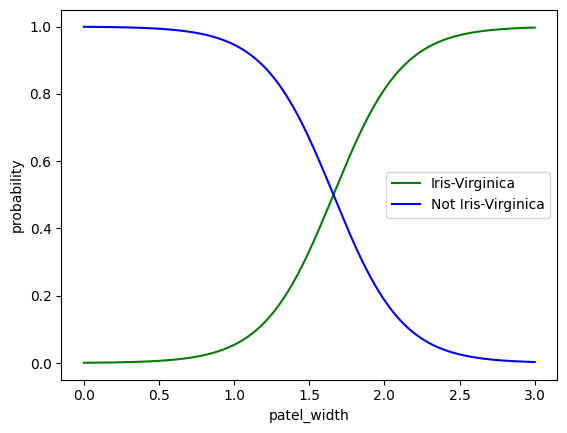

In [69]:
from sklearn.linear_model import LogisticRegression
logistic_reg=LogisticRegression()
logistic_reg.fit(X,y)
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_prob=logistic_reg.predict_proba(X_new)
plt.plot(X_new,y_prob[:,1], "g-", label="Iris-Virginica")
plt.plot(X_new,y_prob[:,0],"b-", label="Not Iris-Virginica")
plt.xlabel("patel_width")
plt.ylabel("probability")
plt.legend()
plt.show()

In [70]:
Z=y_prob[y_prob>0.5]

In [71]:
logistic_reg.predict([[1.7], [1.5]])

array([1, 0])